# Plots

Here, we explore some of the plots in the ProcessOptimizer package, and investigate the
options they include.

We also introduce uncertainty, since it is easier to understand when you can plot it.

This notebook is a part of the series about using ProcessOptimizer to guide a gold
mining expedition. For an overview, go to the markdown file gold_mining.md

We start out defining our ProcessOptimizer, and making the standard plot_objectives

We dug at [12.75, 5.25] and found 2.7 mg gold.
We dug at [2.25, 14.25] and found 1.3 mg gold.
We dug at [8.25, 9.75] and found 2.6 mg gold.
We dug at [0.75, 12.75] and found 1.9 mg gold.
We dug at [11.25, 3.75] and found 2.8 mg gold.
We dug at [3.75, 8.25] and found 2.3 mg gold.
We dug at [14.25, 2.25] and found 1.4 mg gold.
We dug at [6.75, 11.25] and found 2.3 mg gold.
We dug at [5.25, 0.75] and found 3.0 mg gold.
We dug at [9.75, 6.75] and found 2.9 mg gold.


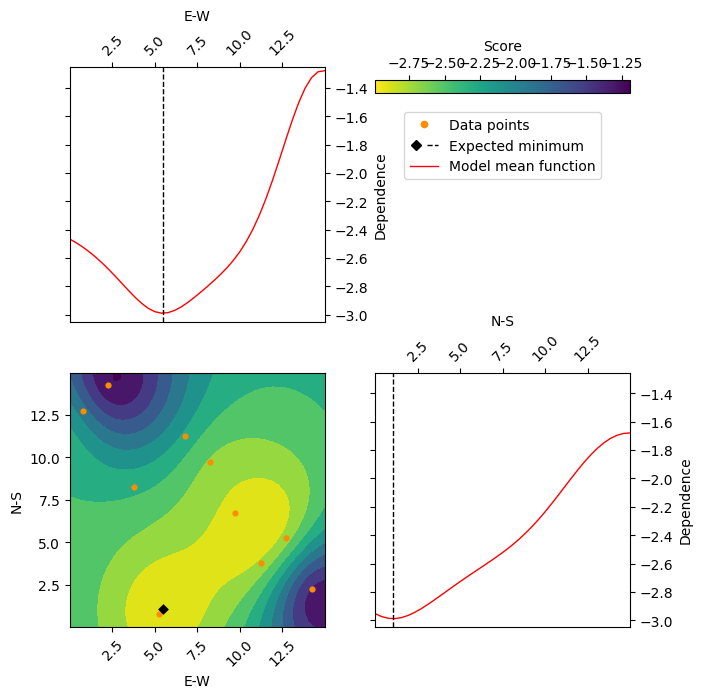

: 

In [2]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import ProcessOptimizer
from ProcessOptimizer.model_systems.model_system import ModelSystem

#Setting random seed to ensure reproducible behaviour
np.random.seed(42)

coordinates = [(0, 15.0),(0,15.0)]

def score(coordinates: List[int]):
    """ Modified Branin-Hoo function. It has three local minima.
    More details: <http://www.sfu.ca/~ssurjano/branin.html>
    """
    x = 10-coordinates[0]
    y = coordinates[1]
    gold_found = ((y - 1/8 * x ** 2 + 1.6 * x - 6) ** 2 + 10 * np.cos(x) - 299)/100
    if VERBOSE:
        print(f"We dug at {coordinates} and found {-round(gold_found*10)/10} mg gold.")
    return gold_found

data_model = ModelSystem(score=score,space=coordinates,noise_model="zero")

VERBOSE = True
# Starting the ProcessOptmizer, and telling it about our plot of land
opt = ProcessOptimizer.Optimizer(dimensions=coordinates)

# For each of the first 10 positions
for index in range(10):
    # Find the place to dig
    new_dig_site = opt.ask()
    # Digging for gold
    gold_found = data_model.score(new_dig_site)
    # Telling the optimiser how much gold we found
    result = opt.tell(new_dig_site, gold_found)

# plotting
ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"]);

The coloured plot in the lower left(2D plot) shows the internal model for how much gold
is will be found for each position.

The colour scale of the 2D plot is defined in the upper right. Notice that
this scale is negative. This is because the ProcessOptimizer is a minimizer, so in order
for it to work, we give the negative value for the amount of gold 

In the D plot, the sites where we have dug are marked as orange diamonds. The expected
optimum it marked as a black diamond.

The two line graphs in the top left and lower right shows 